<a href="https://colab.research.google.com/github/ermax775/LSTM-TimeSeries1/blob/main/RNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # , force_remount = True

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
df = pd.read_csv('test6.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'


In [ ]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


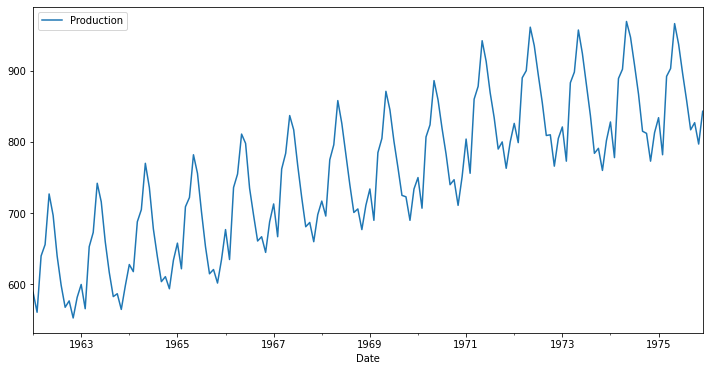

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas.util.testing as tm

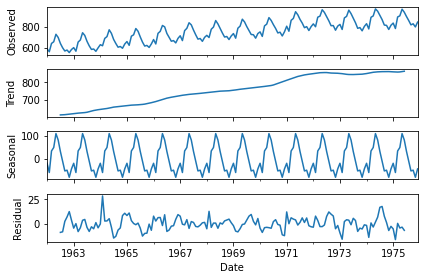

In [ ]:
results = seasonal_decompose(df['Production'])
results.plot();

In [ ]:
len(df)

168

In [ ]:
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01923077 0.20913462 0.24759615]
Predict this y: 
 [[0.41826923]]


In [ ]:
X,y = generator[2]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.20913462 0.24759615 0.41826923]
Predict this y: 
 [[0.34615385]]


In [ ]:
X,y = generator[3]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.24759615 0.41826923 0.34615385]
Predict this y: 
 [[0.20913462]]


In [ ]:
X.shape # for every single input, it considers a batch of 3 features at a time and results 4 outputs as an array

(1, 3, 1)

In [ ]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features))) # 100 neurons
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# from tensorflow.keras.utils import Sequence

In [ ]:
#   !pip install q keras==2.7.0

     |████████████████████████████████| 1.3 MB 4.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 1.2.2
    Uninstalling Keras-1.2.2:
      Successfully uninstalled Keras-1.2.2


In [ ]:
# fit model
model.fit(generator,epochs=20)

Epoch 1/20
144/144 [==============================] - 3s 7ms/step - loss: 0.0444
Epoch 2/20
144/144 [==============================] - 1s 8ms/step - loss: 0.0229
Epoch 3/20
144/144 [==============================] - 1s 8ms/step - loss: 0.0231
Epoch 4/20
144/144 [==============================] - 1s 8ms/step - loss: 0.0162
Epoch 5/20
144/144 [==============================] - 1s 8ms/step - loss: 0.0109
Epoch 6/20
144/144 [==============================] - 1s 7ms/step - loss: 0.0084
Epoch 7/20
144/144 [==============================] - 1s 7ms/step - loss: 0.0057
Epoch 8/20
144/144 [==============================] - 1s 7ms/step - loss: 0.0068
Epoch 9/20
144/144 [==============================] - 1s 7ms/step - loss: 0.0100
Epoch 10/20
144/144 [==============================] - 1s 7ms/step - loss: 0.0041
Epoch 11/20
144/144 [==============================] - 1s 7ms/step - loss: 0.0042
Epoch 12/20
144/144 [==============================] - 1s 7ms/step - loss: 0.0039
Epoch 13/20
144/144 [====

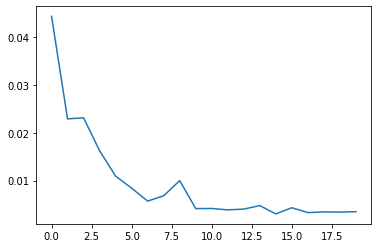

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

array([[0.6285994]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1);

In [ ]:
test_predictions

[array([0.6285994], dtype=float32),
 array([0.6683432], dtype=float32),
 array([0.81076026], dtype=float32),
 array([0.9016483], dtype=float32),
 array([0.9996097], dtype=float32),
 array([1.0085849], dtype=float32),
 array([0.953922], dtype=float32),
 array([0.8333053], dtype=float32),
 array([0.71592647], dtype=float32),
 array([0.6366821], dtype=float32),
 array([0.6033711], dtype=float32),
 array([0.61446357], dtype=float32)]

In [ ]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


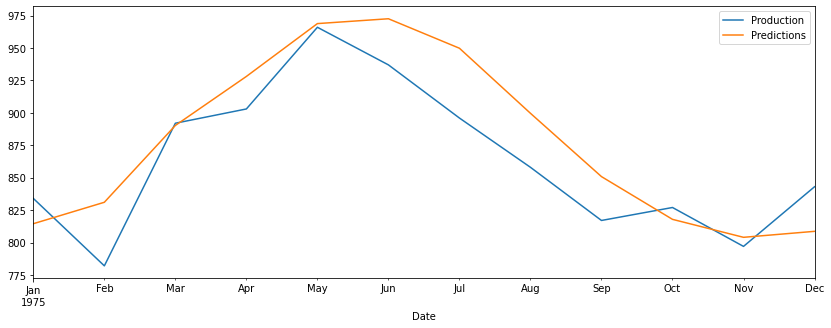

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

31.33410430173755
